In [9]:
# environment set up
import keras
from keras.models import Sequential
from keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import tensorflow as tf # only use tensorflow keras
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd

# working folder
directory = "/Users/Srikar/Desktop/Velexi/spectra-ml/data"
os.chdir(directory)

# print(os.getcwd())

In [10]:
# dataset = str(directory + "/dataset3")
# num_samples = len([name for name in os.listdir(dataset) if \
#                    os.path.isfile(os.path.join(dataset,name))])

# print(num_samples)

In [11]:
stddata_path = directory+"/stddataold"
metadata = pd.read_csv(stddata_path+"/spectra-metadata.csv", sep="|")
metadata.head()

,id,material,spectrometer_purity_code,measurement_type,raw_data_path
0,23077,Rangeland C03-022 S12% G22%,ASDFRa,AREF,ChapterV_Vegetation/splib07a_Rangeland_C03-022...
1,22344,Marsh SPAL92%...a CRMS322v78,ASDFRa,AREF,ChapterV_Vegetation/splib07a_Marsh_SPAL92%...a...
2,22136,Tumbleweed ANP92-2C Dry,BECKa,AREF,ChapterV_Vegetation/splib07a_Tumbleweed_ANP92-...
3,24017,Rangeland L02-069 S00% G99%,ASDFRa,AREF,ChapterV_Vegetation/splib07a_Rangeland_L02-069...
4,21060,Douglas-Fir YNP-DF-1 forest,AVIRISb,RTGC,ChapterV_Vegetation/splib07a_Douglas-Fir_YNP-D...


In [7]:
def find_record(string):
    ind = string.find("|")
    return string[:ind]

In [20]:
data = metadata.iloc[0]
type(data)

metadata[metadata["material"].str.match("Chlor")].shape[0]

34

In [8]:
record_nums = []
y = []
spectrum_names = []

for i in range(metadata.shape[0]):
    data = metadata.iloc[i, 0]
    if data.find("Actinolite") != -1: # if material name contains actinolite
        record_nums.append(data[0])
        y.append(int(0))
        spectrum_names.append("Actinolite")
    elif data.find("Alun") != -1:
        record_nums.append(find_record(data))
        y.append(int(1))
        spectrum_names.append("Alunite")
    elif (data.find("Chlorit") != -1 or data.find("Chlor") != -1 or data.find("Chlor+") != -1 or data.find("Chl.") != -1):
        record_nums.append(find_record(data))
        y.append(int(2))
        spectrum_names.append("Chlorite")

y = np.reshape(y, (len(y), 1))
num_samples = len(record_nums)
print(num_samples)
print(len(y))
print(type(y))

118
118
<class 'numpy.ndarray'>


In [7]:
spectrum_len = 500
spectra = np.zeros((num_samples,spectrum_len))
wavelengths = np.zeros((1,spectrum_len))

# y = np.zeros((num_samples, 1))

In [8]:
# import shutil

# for num in actinolite:
#     shutil.copy2(stddata_path+"/{}.csv".format(num), directory+"/Std_Actinolite")
# for num in alunite:
#     shutil.copy2(stddata_path+"/{}.csv".format(num), directory+"/Std_Alunite")
# for num in chlorite:
#     shutil.copy2(stddata_path+"/{}.csv".format(num), directory+"/Std_Chlorite")

In [13]:
num_neg = 0
for i in range(num_samples):
    hasnegative = False
    data = pd.read_csv(stddata_path+"/{}.csv".format(record_nums[i]))
    if i == 0:
        wavelengths[i,:] = data.iloc[:, 0].to_numpy()
    spectra[i,:] = data.iloc[:, 1].to_numpy()
    for j in range(spectrum_len):
        if spectra[i,j] < 0:
            hasnegative = True
            spectra[i,j] = 0
    if hasnegative:
        print(record_nums[i])
        num_neg += 1
# print(num_neg)
# wavelengths
# print(record_nums[43])
# print(spectra[43])

11656
12935
11831
11725
11785
12759
11751
11768
240
719
2735
2748
740
685
2718
2662
753
201
2714
211
662
996
960
883
944
672
2750
2697
802
976
2597
915
899
785
706
2632
2684
769
164
855


In [14]:
# spectrum_len = 480
# spectra = np.zeros((num_samples,spectrum_len))

# spectrum_categories = np.zeros(num_samples)
# first_record_of_mixtures_chapter = 11602
# is_a_mineral = 1                                   # these numbers match the chapter numbers given by usgs
# is_a_mixture = 2
# spectrum_names = ["" for x in range(num_samples)]

# y = np.zeros((num_samples, 1))

# os.chdir(dataset)

# i = 0

# for filename in os.listdir(dataset):
#     file_object  = open(filename, 'r').readlines()
# #     strip off header, add to matrix 'spectra'
#     spectra[i,:] = file_object[1:]

# #     label spectrum class, based on header
# #     actinolite: 0, alunite: 1, chlorite: 2
#     material_name = file_object[0]
    
#     spectrum_names[i] = material_name
    
#     start = 'Record='
#     end = ':'
#     record_number = int((material_name.split(start))[1].split(end)[0])
#     # print(record_number)
#     if record_number < first_record_of_mixtures_chapter:
#         spectrum_categories[i] = is_a_mineral
#     else:
#         spectrum_categories[i] = is_a_mixture

# #     print(material_name)

#     if material_name.find('Actinolite',) != -1: # if material name contains actinolite
#         y[i,0] = 0
#     elif material_name.find('Alun',)!= -1:
#         y[i,0] = 1
#     else: # chlorite
#         y[i,0] = 2

# #     turn missing points into 0
#     for j in range(spectrum_len):
#         if spectra[i,j] < 0:
#             spectra[i,j] = 0
#     i+=1

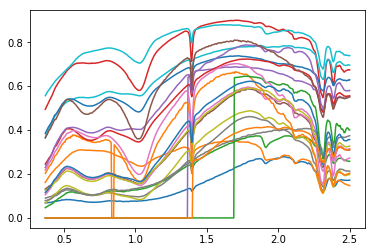

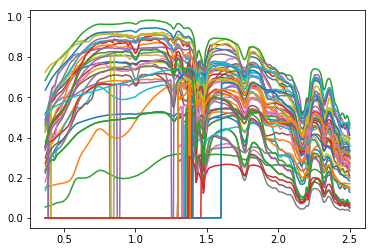

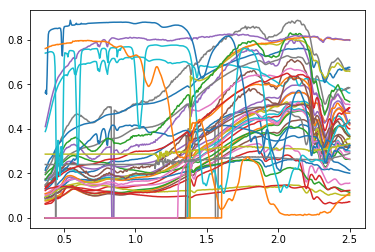

In [15]:
# --- plot the classes

# plot each class in a separate plot
# plot spectra names in legend
# plot minerals and mixtures w diff line widths

mineral_names = ["Actinolite", "Alunite", "Chlorite"]

# variables
num0 = 0 #number of samples of class 0
num1 = 0
num2 = 0

mineral_linewidth = 1         # linewidth = 1 is default
mixture_linewidth = 3         

# count the number of each class to make spectra0, spectra1, spectra2 databases
for i in range(num_samples):
    if y[i,0]== 0:
        num0 += 1
    elif y[i,0]== 1:
        num1 += 1
    elif y[i,0]== 2:
        num2 += 1

# make class-specific databases spectra0, ...1, ...2
spectra0 = np.zeros((num0,spectrum_len)) 
spectra1 = np.zeros((num1,spectrum_len)) 
spectra2 = np.zeros((num2,spectrum_len)) 

labels0 = ["" for x in range(num0)]
labels1 = ["" for x in range(num1)]
labels2 = ["" for x in range(num2)]

linewidth0 = np.zeros(num0)
linewidth1 = np.zeros(num1)
linewidth2 = np.zeros(num2)


# make counters for each database to place spectra
i0 = 0
i1 = 0
i2 = 0

# set linewidth for the spectrum 
# populate class-specific databases spectra0, ...1, ...2
for i in range(num_samples):
    
    # set linewidth
    #testcode
    #print(spectrum_categories)
    #print(spectrum_categories[i])
    
#     if spectrum_categories[i] == is_a_mineral:
#         linewidth = mineral_linewidth
        
#         #testcode
#         #print('min')
#     else: 
#         linewidth = mixture_linewidth
    linewidth = 2
        
        #testcode
        #print('mix')
    
    # populate matrices for making each class plot
    if y[i,0]== 0:
        spectra0[i0,:] = spectra[i,:]
        labels0[i0] = spectrum_names[i]
        linewidth0[i0] = linewidth
        i0 +=1
    elif y[i,0]== 1:
        spectra1[i1,:] = spectra[i,:]
        labels1[i1] = spectrum_names[i]
        linewidth1[i1] = linewidth
        i1 +=1
    else:
        spectra2[i2,:] = spectra[i,:]
        labels2[i2] = spectrum_names[i]
        linewidth2[i2] = linewidth
        i2 +=1

# plot each class-specific database separately
for i in range(i0):
#     fig = plt.figure()
#     plt.plot(range(1, spectrum_len+1), spectra0[i,:], label = labels0[i], linewidth = linewidth0[i]) # remove linewidth for all mixtures/minerals to be standard
    plt.plot(wavelengths[0,:], spectra0[i,:]) # remove linewidth for all mixtures/minerals to be standard
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()
#     path = "/Users/Srikar/Desktop/Velexi/spectra-ml/lab-notebook/smunukutla/plots/" + mineral_names[0] + str(i) + ".png"
#     fig.savefig(path, format = "PNG")
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i1):
#     plt.plot(range(1, spectrum_len+1), spectra1[i,:], label = labels1[i], linewidth = linewidth1[i])
    plt.plot(wavelengths[0,:], spectra1[i,:])
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i2):
#     plt.plot(range(1, spectrum_len+1), spectra2[i,:], label = labels2[i], linewidth = linewidth2[i])
    plt.plot(wavelengths[0,:], spectra2[i,:])
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [16]:
sample_indices = list(range(0, num_samples))
print(num_samples)
random.shuffle(sample_indices)
train_set_size = 3*(num_samples//5)
dev_set_size = (num_samples//5)
test_set_size= num_samples-dev_set_size - train_set_size
print(train_set_size)
print(test_set_size)
print(dev_set_size)
train_set_indices = sample_indices[:train_set_size]
dev_set_indices = sample_indices[train_set_size: train_set_size+dev_set_size]
test_set_indices= sample_indices[train_set_size+dev_set_size: num_samples]
print(train_set_indices)
print(test_set_indices)
print(dev_set_indices)

train_set = spectra[train_set_indices, :]
train_labels = y[train_set_indices, :]
dev_set = spectra[dev_set_indices, :]
dev_labels = y[dev_set_indices, :]
test_set = spectra[test_set_indices, :]
test_labels = y[test_set_indices, :]

118
69
26
23
[96, 8, 0, 31, 41, 54, 113, 36, 87, 115, 45, 88, 81, 50, 83, 56, 75, 10, 89, 4, 13, 108, 77, 32, 107, 99, 65, 23, 80, 70, 61, 51, 34, 14, 116, 3, 92, 64, 20, 39, 19, 62, 15, 52, 40, 79, 94, 86, 9, 11, 76, 101, 91, 57, 110, 26, 35, 82, 93, 55, 85, 97, 46, 22, 27, 5, 104, 102, 72]
[68, 7, 78, 37, 63, 43, 74, 66, 38, 24, 29, 48, 109, 12, 73, 60, 98, 42, 28, 47, 106, 16, 117, 18, 1, 53]
[90, 71, 67, 103, 17, 21, 114, 111, 84, 25, 69, 30, 100, 44, 112, 95, 33, 49, 2, 59, 105, 6, 58]


In [17]:
train_labels = train_labels.flatten()
dev_labels = dev_labels.flatten()
test_labels = test_labels.flatten()
# type(train_labels)

In [18]:
# len(train_set)
# len(train_set[17])
print(test_set.shape)

(26, 500)


In [19]:
train_set = np.reshape(train_set, (train_set.shape[0], spectrum_len, 1))
dev_set = np.reshape(dev_set, (dev_set.shape[0], spectrum_len, 1))
test_set = np.reshape(test_set, (test_set.shape[0], spectrum_len, 1))

train_labels = np.reshape(train_labels, (train_labels.shape[0], 1))
dev_labels = np.reshape(dev_labels, (dev_labels.shape[0], 1))
test_labels = np.reshape(test_labels, (test_labels.shape[0], 1))

train_labels = to_categorical(train_labels)
dev_labels = to_categorical(dev_labels)
test_labels = to_categorical(test_labels)

In [20]:
print(train_labels)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [21]:
model = Sequential()
# model.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model.add(Conv1D(64, 25, activation='relu', input_shape=(train_set.shape[1], 1)))
model.add(Conv1D(64, 25, activation='relu'))
model.add(MaxPooling1D(4)) # 108 by 64 so far
model.add(Conv1D(100, 25, activation='relu'))
model.add(Conv1D(100, 25, activation='relu'))
model.add(MaxPooling1D(4))
# model.add(Dropout(0.5))
# model.add(GlobalAveragePooling1D())
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 476, 64)           1664      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 452, 64)           102464    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 113, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 89, 100)           160100    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 65, 100)           250100    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 16, 100)           0         
_________________________________________________________________
flat

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 12
EPOCHS = 50

print(train_labels.shape)
model.fit(train_set, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=(dev_set, dev_labels)) 

(69, 3)
Instructions for updating:
Use tf.cast instead.
Train on 69 samples, validate on 23 samples
Epoch 1/50
69/69 [==============================] - 1s 18ms/step - loss: 1.0136 - acc: 0.4348 - val_loss: 1.0950 - val_acc: 0.3043
Epoch 2/50
69/69 [==============================] - 1s 12ms/step - loss: 1.0895 - acc: 0.5217 - val_loss: 0.9226 - val_acc: 0.5652
Epoch 3/50
69/69 [==============================] - 1s 11ms/step - loss: 0.8900 - acc: 0.5217 - val_loss: 0.9108 - val_acc: 0.5217
Epoch 4/50
69/69 [==============================] - 1s 11ms/step - loss: 0.8025 - acc: 0.6377 - val_loss: 1.1851 - val_acc: 0.6522
Epoch 5/50
69/69 [==============================] - 1s 11ms/step - loss: 0.8123 - acc: 0.7391 - val_loss: 1.6022 - val_acc: 0.6522
Epoch 6/50
69/69 [==============================] - 1s 11ms/step - loss: 0.6448 - acc: 0.7246 - val_loss: 1.3887 - val_acc: 0.6522
Epoch 7/50
69/69 [==============================] - 1s 11ms/step - loss: 0.6012 - acc: 0.8116 - val_loss: 1.5259 -

In [23]:
y_pred = model.predict(test_set)
y_pred

array([[9.99471366e-01, 5.28600300e-04, 1.29468355e-18],
       [3.43356151e-05, 9.99965668e-01, 6.71215705e-09],
       [5.93815712e-05, 2.45392221e-15, 9.99940634e-01],
       [1.64179190e-04, 1.69002160e-01, 8.30833614e-01],
       [9.13691110e-06, 1.83124627e-10, 9.99990821e-01],
       [5.61086233e-10, 1.05043882e-05, 9.99989510e-01],
       [1.37310269e-12, 1.17178671e-01, 8.82821321e-01],
       [3.80375654e-01, 1.73496127e-01, 4.46128219e-01],
       [1.58209625e-17, 1.00000000e+00, 4.35081349e-09],
       [9.38880384e-01, 6.03215173e-02, 7.98096182e-04],
       [1.17346430e-02, 1.18098615e-08, 9.88265395e-01],
       [9.99848723e-01, 1.50653463e-08, 1.51213564e-04],
       [2.21243153e-17, 9.99816000e-01, 1.84080447e-04],
       [2.86291633e-02, 6.80399921e-07, 9.71370161e-01],
       [9.99998093e-01, 2.25462191e-08, 1.90784067e-06],
       [1.82662271e-02, 7.56566851e-06, 9.81726229e-01],
       [9.99930382e-01, 4.68301550e-06, 6.49798239e-05],
       [1.00000000e+00, 1.51347

In [24]:
test_labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [25]:
model.evaluate(test_set, test_labels)

26/26 [==============================] - 0s 3ms/step


[1.2078019380569458, 0.807692289352417]